In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
import numpy as np
import random

series = np.zeros(100)

n = 100000

expected = np.full(100, n/100)

for i in range(n):
    series[random.randint(0, 99)] += 1
    
rss = np.sum((expected-series)**2)

print(rss)

87626.0


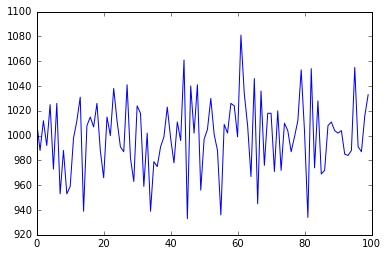

In [51]:
plt.plot(series)
plt.show()

In [54]:
def draw_series_rss(n, bins=100):
    
    expected = np.full(bins, n/bins)
    
    observed = np.zeros(bins)
    
    for _ in range(n):
        observed[random.randint(0, bins-1)] += 1
        
    return np.sum((expected-observed)**2)

In [68]:
X = range(0, 10000, 1000)

Y = []
for n in X:
    samples = [draw_series_rss(n) for _ in range(1000)]
    Y.append(np.std(samples))

In [69]:
print(X, Y)

range(0, 10000, 1000) [0.0, 141.44240631437236, 293.13637061272351, 421.30486223636206, 557.08381701858832, 731.77841115736669, 833.39741006317024, 1023.6193516263747, 1140.8993792618171, 1301.9354791616979]


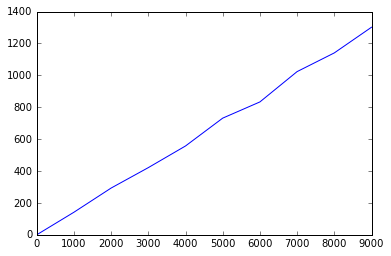

In [70]:
plt.plot(X, Y)
plt.show()

In [73]:
import statsmodels.api as sm

mod = sm.OLS(Y, list(X))

res = mod.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.774e+04
Date:                Tue, 25 Oct 2016   Prob (F-statistic):           5.15e-17
Time:                        21:27:48   Log-Likelihood:                -40.432
No. Observations:                  10   AIC:                             82.86
Df Residuals:                       9   BIC:                             83.17
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.1435      0.001    166.567      0.000         0.142     0.145
==============================================================================
Omnibus:                        0.333   Durbin-Watson:                   3.296
Prob(Omnibus):                  0.847   Jarque-Bera (JB):                0.409
Skew:                          -0.316   Prob(JB):                        0.815
Kurtosis:                       2.237   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""